####  Import Packages

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
file_path = 'MHR.csv'

In [122]:
p_colors = ['darkgreen', 'darkorange', 'darkred']
risk_order = ["low risk", "mid risk", "high risk"]

#### Import Dataset

In [123]:
df = pd.read_csv(file_path)
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Predictor and Target
We will use histogram with hue mapping to visualize the predictor variables data distribution based on the target variable. Also, since our predictor variable only has few unique values, we can also use pandas crosstab to see the detailed values.

####  Age → RiskLevel

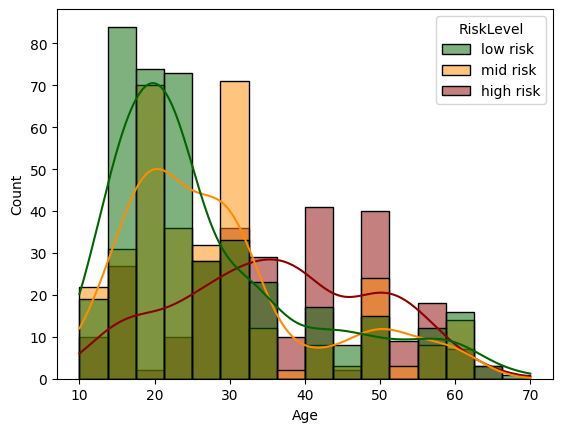

In [124]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [125]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


#### Key Observations for Age and Risk Levels:

---



1. **Age Distribution and Risk Levels**:
   - **Low Risk**: Predominantly observed in individuals aged between 10 and 25 years, with a peak in the early 20s.
   - **Mid Risk**: Most common in individuals aged 20 to 35 years, peaking in the late 20s to early 30s.
   - **High Risk**: Noticeably higher in individuals aged 35 and above, with significant cases starting from 40 years, and peaking around the age of 50.

2. **Risk Level Transitions with Age**:
   - **Below 25 years**: Majority are at low risk, with minimal mid or high-risk cases.
   - **25 to 35 years**: Increase in mid-risk cases, and a decrease in low-risk cases.
   - **Above 35 years**: Significant rise in high-risk cases, low-risk cases diminish.

3. **Density Estimates**:
   - **Low Risk**: Sharp peak around early 20s.
   - **Mid Risk**: Peaks in late 20s to early 30s.
   - **High Risk**: Rises steadily from late 30s, peaking around 50 years.

4. **Overlap and Transition Periods**:
   - Notable overlap of low and mid-risk categories in the 20-25 age range.
   - Significant overlap of mid and high-risk categories from the late 30s to 40s.



**Age-Related Health Risks**:
   - Age is a crucial factor in determining health risk levels. Younger individuals are generally at low risk, whereas older individuals are more likely to be at high risk.



#### SystolicBP → RiskLevel

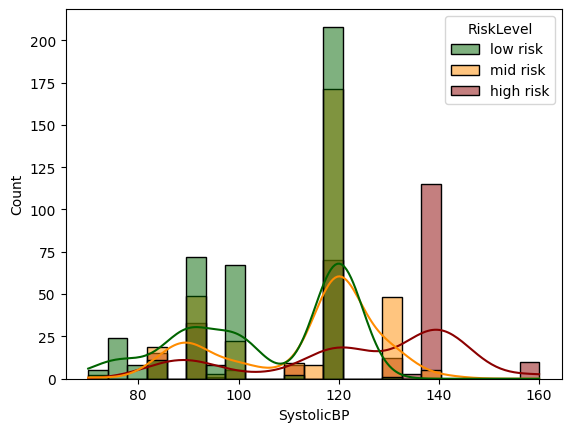

In [126]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [127]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


#### Key Observations for Systolic Blood Pressure (SystolicBP) and Risk Levels:

---



1. **SystolicBP Distribution and Risk Levels**:
   - **Low Risk**: Predominantly seen in individuals with SystolicBP around 120 mmHg. Noticeable peaks are also observed at lower SystolicBP values (80-100 mmHg).
   - **Mid Risk**: Commonly seen in the SystolicBP range of 100-130 mmHg. Peaks are less pronounced but spread across this range.
   - **High Risk**: Clearly observed in individuals with SystolicBP above 140 mmHg. There is a significant peak at around 140 mmHg.

2. **Risk Level Transitions with SystolicBP**:
   - **Below 100 mmHg**: Mostly low risk, with a few mid-risk and high-risk cases.
   - **100-130 mmHg**: Increase in mid-risk cases, indicating a transition zone where risk levels start to rise.
   - **Above 130 mmHg**: Significant rise in high-risk cases, especially around 140 mmHg and above.

3. **Density Estimates**:
   - **Low Risk**: Sharp peak at 120 mmHg, with secondary peaks at lower pressures.
   - **Mid Risk**: Multiple small peaks across the 100-130 mmHg range.
   - **High Risk**: Prominent peak at around 140 mmHg, with a gradual rise starting from 130 mmHg.

4. **Overlap and Transition Periods**:
   - Notable overlap of low and mid-risk categories around 100-130 mmHg, indicating a critical range where monitoring and intervention might be necessary.
   - Significant overlap of mid and high-risk categories from 130 mmHg onwards, highlighting a zone of increased health risk.


**Blood Pressure-Related Health Risks**:
   - Systolic blood pressure is a crucial factor in determining health risk levels. Lower SystolicBP is generally associated with low risk, while higher SystolicBP is linked to increased risk levels.



#### DiastolicBP → RiskLevel

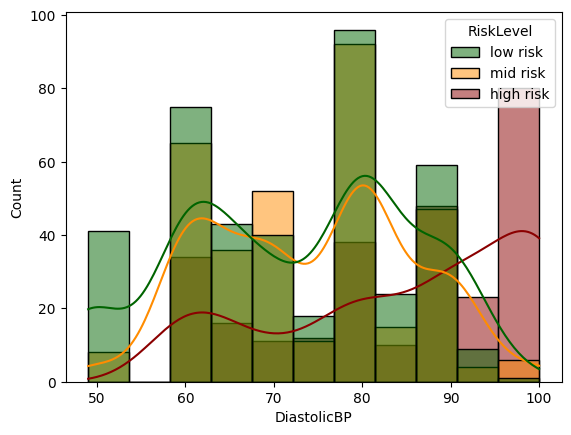

In [128]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [129]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


#### Key Observations for Diastolic Blood Pressure (DiastolicBP) and Risk Levels:

---



1. **DiastolicBP Distribution and Risk Levels**:
   - **Low Risk**: Predominantly seen in individuals with diastolic blood pressure (DiastolicBP) around 60-80 mmHg. There are noticeable peaks at 60 mmHg, 70 mmHg, and 80 mmHg.
   - **Mid Risk**: Commonly observed in the DiastolicBP range of 70-80 mmHg. There is a peak around 70 mmHg.
   - **High Risk**: Clearly observed in individuals with DiastolicBP of 100 mmHg, with a significant peak at this value.

2. **Risk Level Transitions with DiastolicBP**:
   - **Below 70 mmHg**: Mostly low risk, with a few mid-risk cases and very few high-risk cases.
   - **70-80 mmHg**: Transition zone where the number of mid-risk cases increases. There is an overlap of low and mid-risk categories.
   - **Above 80 mmHg**: Significant rise in high-risk cases, especially at 100 mmHg.

3. **Density Estimates**:
   - **Low Risk**: Peaks around 60 mmHg and 80 mmHg, with secondary peaks at other intervals.
   - **Mid Risk**: Peaks at 70 mmHg, indicating a transition zone.
   - **High Risk**: Prominent peak at around 100 mmHg, with a gradual rise starting from 80 mmHg.

4. **Overlap and Transition Periods**:
   - Notable overlap of low and mid-risk categories around 70-80 mmHg, indicating a critical range where monitoring and intervention might be necessary.
   - Significant overlap of mid and high-risk categories from 80 mmHg onwards, highlighting a zone of increased health risk.



**Blood Pressure-Related Health Risks**:
   - Diastolic blood pressure is a crucial factor in determining health risk levels. Lower DiastolicBP is generally associated with low risk, while higher DiastolicBP is linked to increased risk levels.


#### BS → RiskLevel

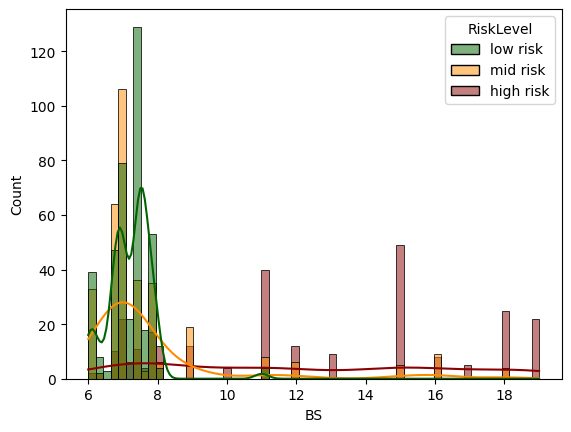

In [130]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [131]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='summer_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


#### Key Observations for Blood Sugar (BS) and Risk Levels:

---



1. **BS Distribution and Risk Levels**:
   - **Low Risk**: Predominantly seen in individuals with blood sugar (BS) levels around 6 to 8 mmol/L. There is a sharp peak at 7 mmol/L.
   - **Mid Risk**: Observed in the BS range of 6 to 8 mmol/L, with a peak around 7 mmol/L.
   - **High Risk**: Clearly observed in individuals with BS levels above 10 mmol/L, with several peaks at 12, 14, and 16 mmol/L.

2. **Risk Level Transitions with BS**:
   - **Below 6 mmol/L**: Mostly low risk, with very few mid or high-risk cases.
   - **6 to 8 mmol/L**: Transition zone where the number of mid-risk cases increases, and low-risk cases are predominant.
   - **Above 10 mmol/L**: Significant rise in high-risk cases, indicating severe health risks associated with higher BS levels.

3. **Density Estimates**:
   - **Low Risk**: Sharp peak around 7 mmol/L, indicating a concentration of low-risk individuals in this range.
   - **Mid Risk**: Peaks at 7 mmol/L, showing overlap with low-risk individuals.
   - **High Risk**: Multiple peaks at higher BS values (12, 14, 16 mmol/L), indicating that higher BS levels are strongly associated with high health risks.

4. **Overlap and Transition Periods**:
   - Notable overlap of low and mid-risk categories around 6 to 8 mmol/L, indicating a critical range for monitoring and intervention.
   - High-risk cases become predominant above 10 mmol/L, with minimal overlap with low or mid-risk categories.


**Blood Sugar-Related Health Risks**:
   - Blood sugar levels are a crucial factor in determining health risk levels. Lower BS levels (6-8 mmol/L) are generally associated with low risk, while higher BS levels (above 10 mmol/L) are linked to increased health risks.


#### BodyTemp → RiskLevel

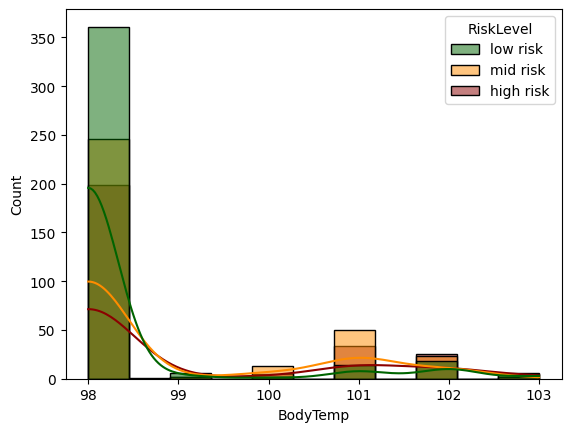

In [132]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [133]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


#### Key Observations for Body Temperature (BodyTemp) and Risk Levels:

---



1. **BodyTemp Distribution and Risk Levels**:
   - **Low Risk**: Predominantly seen in individuals with a body temperature around 98°F. This category has the highest count.
   - **Mid Risk**: Commonly observed in the body temperature range of 100-101°F.
   - **High Risk**: Noticeable in individuals with a body temperature of 101-103°F, but the counts are relatively low compared to lower body temperatures.

2. **Risk Level Transitions with BodyTemp**:
   - **98°F**: Majority are at low risk, with some individuals at mid and high risk.
   - **100-101°F**: Increase in mid-risk cases, indicating a transition zone where risk levels start to rise.
   - **101-103°F**: Significant rise in high-risk cases, indicating increased health risks associated with higher body temperatures.

3. **Density Estimates**:
   - **Low Risk**: Sharp peak at 98°F, indicating a concentration of low-risk individuals at this temperature.
   - **Mid Risk**: Peaks at 100-101°F, showing overlap with low-risk individuals.
   - **High Risk**: Peaks at 101-103°F, indicating higher body temperatures are associated with high health risks.

4. **Overlap and Transition Periods**:
   - Notable overlap of low and mid-risk categories around 98-101°F, indicating a critical range for monitoring and intervention.
   - High-risk cases become more prominent at temperatures above 101°F, with minimal overlap with low-risk categories.



**Body Temperature-Related Health Risks**:
   - Body temperature is a crucial factor in determining health risk levels. Lower body temperatures (98°F) are generally associated with low risk, while higher body temperatures (above 101°F) are linked to increased health risks.

#### HeartRate → RiskLevel

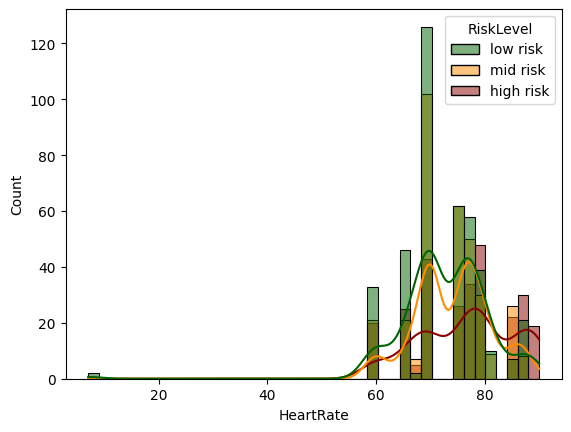

In [134]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [135]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


#### Key Observations for Heart Rate (HeartRate) and Risk Levels:

---



1. **HeartRate Distribution and Risk Levels**:
   - **Low Risk**: Predominantly seen in individuals with a heart rate around 60-70 bpm. There is a sharp peak at 70 bpm.
   - **Mid Risk**: Commonly observed in the heart rate range of 70-80 bpm.
   - **High Risk**: Noticeable in individuals with heart rates around 80-90 bpm, with peaks at 80 bpm and 90 bpm.

2. **Risk Level Transitions with HeartRate**:
   - **Below 60 bpm**: Mostly low risk, with very few mid or high-risk cases.
   - **60-80 bpm**: Transition zone where the number of mid-risk cases increases. There is significant overlap with low-risk individuals.
   - **Above 80 bpm**: Significant rise in high-risk cases, indicating increased health risks associated with higher heart rates.

3. **Density Estimates**:
   - **Low Risk**: Sharp peak around 70 bpm, indicating a concentration of low-risk individuals at this heart rate.
   - **Mid Risk**: Peaks at 70-80 bpm, showing overlap with low-risk individuals.
   - **High Risk**: Peaks at 80-90 bpm, indicating higher heart rates are associated with higher health risks.

4. **Overlap and Transition Periods**:
   - Notable overlap of low and mid-risk categories around 60-80 bpm, indicating a critical range for monitoring and intervention.
   - High-risk cases become more prominent at heart rates above 80 bpm, with minimal overlap with low-risk categories.



**Heart Rate-Related Health Risks**:
   - Heart rate is a crucial factor in determining health risk levels. Lower heart rates (60-70 bpm) are generally associated with low risk, while higher heart rates (above 80 bpm) are linked to increased health risks.





---


**Age :** Understanding the relationship between age and risk helps to retain
this feature despite regularization, especially since different age groups show different risk levels.


---



**Systolic and Diastolic Blood Pressure:**Strong relationships with risk levels suggest these features should be retained. Their interaction might also be significant.



---


**Blood Sugar (BS):** The clear increase in risk with higher BS levels makes it a crucial feature.


---



**Body Temperature:** Different ranges of body temperature relate to different risk levels, which is important information for the model.



---


**Heart Rate:** Even though heart rate shows significant overlaps, understanding its specific ranges associated with different risk levels helps in deciding its transformation or interaction with other features.


---

